# Analysis More Time Temp & Wind
This notebook contains exploratory data analysis and plots to asses GAN performance.

## Packages

In [1]:
# data
import netCDF4 as nc
import numpy as np

import pandas as pd

# models 
import tensorflow as tf
print(tf.__version__)
#tf.disable_eager_execution()
#tf.enable_eager_execution()
tf.compat.v1.enable_eager_execution()

# must be True
print(tf.executing_eagerly())

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

import os

import helper_functions as hf
from skimage.metrics import structural_similarity as ssim

import importlib as imp

2.8.0
True


In [2]:
imp.reload(hf)

<module 'helper_functions' from 'E:\\Universiteit\\Jaar_6\\Master_Thesis_Part_2\\Sebastian_modified_software\\helper_functions.py'>

## Reading data

Data is from two sources NCEP and WRF. WRF is at two different resolutions, 3km and 9km. NCEP is originally at natice resolution 0.25 degree but use interpolated to 18km.

In [3]:
# TRAIN

# WRF 3km
T_WRF_3km = np.load('F:/Master_Thesis/Data/Analysis_More_Time/T_WRF_3km.npy')
U_WRF_3km = np.load('F:/Master_Thesis/Data/Analysis_More_Time/U_WRF_3km.npy')
V_WRF_3km = np.load('F:/Master_Thesis/Data/Analysis_More_Time/V_WRF_3km.npy')

# WRF 9km
T_WRF_9km = np.load('F:/Master_Thesis/Data/Analysis_More_Time/T_WRF_9km.npy')
U_WRF_9km = np.load('F:/Master_Thesis/Data/Analysis_More_Time/U_WRF_9km.npy')
V_WRF_9km = np.load('F:/Master_Thesis/Data/Analysis_More_Time/V_WRF_9km.npy')

# NCEP
T_NCEP_near = np.load('F:/Master_Thesis/Data/Analysis_More_Time/T_NCEP_near.npy')
U_NCEP_near = np.load('F:/Master_Thesis/Data/Analysis_More_Time/U_NCEP_near.npy')
V_NCEP_near = np.load('F:/Master_Thesis/Data/Analysis_More_Time/V_NCEP_near.npy')

# NCEP
T_NCEP_down = np.load('F:/Master_Thesis/Data/Analysis_More_Time/T_NCEP_down.npy')
U_NCEP_down = np.load('F:/Master_Thesis/Data/Analysis_More_Time/U_NCEP_down.npy')
V_NCEP_down = np.load('F:/Master_Thesis/Data/Analysis_More_Time/V_NCEP_down.npy')

In [4]:
# TEST

# WRF 3km
T_WRF_3km_test = np.load('F:/Master_Thesis/Data/Analysis_More_Time/T_WRF_3km_test.npy')
U_WRF_3km_test = np.load('F:/Master_Thesis/Data/Analysis_More_Time/U_WRF_3km_test.npy')
V_WRF_3km_test = np.load('F:/Master_Thesis/Data/Analysis_More_Time/V_WRF_3km_test.npy')

# WRF 9km
T_WRF_9km_test = np.load('F:/Master_Thesis/Data/Analysis_More_Time/T_WRF_9km_test.npy')
U_WRF_9km_test = np.load('F:/Master_Thesis/Data/Analysis_More_Time/U_WRF_9km_test.npy')
V_WRF_9km_test = np.load('F:/Master_Thesis/Data/Analysis_More_Time/V_WRF_9km_test.npy')

# NCEP down
T_NCEP_test = np.load('F:/Master_Thesis/Data/Analysis_More_Time/T_NCEP_test_down.npy')
U_NCEP_test = np.load('F:/Master_Thesis/Data/Analysis_More_Time/U_NCEP_test_down.npy')
V_NCEP_test = np.load('F:/Master_Thesis/Data/Analysis_More_Time/V_NCEP_test_down.npy')

Bicubic interpolation, as a control downscaling technique.

In [5]:
T_bicubic = hf.regrid(hf.downscale_image(T_NCEP_down, K=1/3),2)
U_bicubic = hf.regrid(hf.downscale_image(U_NCEP_down, K=1/3),2)
V_bicubic = hf.regrid(hf.downscale_image(V_NCEP_down, K=1/3),2)

In [6]:
T_bicubic_test = hf.regrid(hf.downscale_image(T_NCEP_test, K=1/3),2)
U_bicubic_test = hf.regrid(hf.downscale_image(U_NCEP_test, K=1/3),2)
V_bicubic_test = hf.regrid(hf.downscale_image(V_NCEP_test, K=1/3),2)

## Exploratory Data Analysis

#### Plot style

In [5]:
import matplotlib as mpl
import matplotlib.colors as mcol

# fontsize
fs = 20

# colormaps
cmap = plt.cm.Spectral  # define the colormap

# define the bins and normalize
# Temperature
T_bounds = range(250,320,1)
T_norm = mcol.BoundaryNorm(T_bounds,cmap.N)

# Wind
W_bounds = range(-40,40,2)
W_norm = mcol.BoundaryNorm(W_bounds,cmap.N)

#### Mu_sig distributions

In [8]:
print(np.mean(T_NCEP_near),np.std(T_NCEP_near))
print(np.mean(T_WRF_9km),np.std(T_WRF_9km))
print('\n')
print(np.mean(T_NCEP_test),np.std(T_NCEP_test))
print(np.mean(T_WRF_9km_test),np.std(T_WRF_9km_test))

284.07272 8.4506645
283.68134 8.747754


282.84042 8.694319
282.85583 9.048827


In [9]:
print(np.mean(U_NCEP_near),np.std(U_NCEP_near))
print(np.mean(U_WRF_9km),np.std(U_WRF_9km))
print('\n')
print(np.mean(U_NCEP_test),np.std(U_NCEP_test))
print(np.mean(U_WRF_9km_test),np.std(U_WRF_9km_test))

-0.17836592 1.3971868
-0.41113052 2.5920742


-0.2602784 1.5614874
-0.28472438 2.4655974


In [10]:
print(np.mean(V_NCEP_near),np.std(V_NCEP_near))
print(np.mean(V_WRF_9km),np.std(V_WRF_9km))
print(np.mean(V_WRF_3km),np.std(V_WRF_3km))
print('\n')
print(np.mean(V_NCEP_test),np.std(V_NCEP_test))
print(np.mean(V_WRF_9km_test),np.std(V_WRF_9km_test))

-0.3488957 1.6794369
-0.7684929 2.6798747
-0.360848 2.5251336


-0.38364783 1.643164
-0.7635211 2.7966301


### RMSE and SSIM
RMSE is the root-mean squared error and will tell about the absolute error between two datasets. SSIM is the structural similarity index measure and will tell about how much the datasets look similar based on their structure. Of course RMSE and SSIM are correlated to a certain degree, but it is possible to keep RMSE constant and vary SSIM.

For deeper understanding we look into these performance measures over time and space.

In [6]:
#selecting right range

T_WRF_9km = T_WRF_9km[:,0:30,0:30]
U_WRF_9km = U_WRF_9km[:,0:30,0:30]
V_WRF_9km = V_WRF_9km[:,0:30,0:30]

T_WRF_9km_test = T_WRF_9km_test[:,0:30,0:30]
U_WRF_9km_test = U_WRF_9km_test[:,0:30,0:30]
V_WRF_9km_test = V_WRF_9km_test[:,0:30,0:30]

T_WRF_3km = T_WRF_3km[:,0:30,0:30]
U_WRF_3km = U_WRF_3km[:,0:30,0:30]
V_WRF_3km = V_WRF_3km[:,0:30,0:30]

T_WRF_3km_test = T_WRF_3km_test[:,0:30,0:30]
U_WRF_3km_test = U_WRF_3km_test[:,0:30,0:30]
V_WRF_3km_test = V_WRF_3km_test[:,0:30,0:30]

In [7]:
T_rms_NCEP_downv9km, T_ssim_NCEP_downv9km = hf.performance_dataset(hf.regrid(T_NCEP_down,6), T_WRF_9km, 'array')
U_rms_NCEP_downv9km, U_ssim_NCEP_downv9km = hf.performance_dataset(hf.regrid(U_NCEP_down,6), U_WRF_9km, 'array')
V_rms_NCEP_downv9km, V_ssim_NCEP_downv9km = hf.performance_dataset(hf.regrid(V_NCEP_down,6), V_WRF_9km, 'array')

T_rms_NCEP_downv3km, T_ssim_NCEP_downv3km = hf.performance_dataset(hf.regrid(T_NCEP_down,6), T_WRF_3km, 'array')
U_rms_NCEP_downv3km, U_ssim_NCEP_downv3km = hf.performance_dataset(hf.regrid(U_NCEP_down,6), U_WRF_3km, 'array')
V_rms_NCEP_downv3km, V_ssim_NCEP_downv3km = hf.performance_dataset(hf.regrid(V_NCEP_down,6), V_WRF_3km, 'array')

In [13]:
T_rms_NCEP_testv9km, T_ssim_NCEP_testv9km = hf.performance_dataset(hf.regrid(T_NCEP_test,6), T_WRF_9km, 'array')
U_rms_NCEP_testv9km, U_ssim_NCEP_testv9km = hf.performance_dataset(hf.regrid(U_NCEP_test,6), T_WRF_9km, 'array')
V_rms_NCEP_testv9km, V_ssim_NCEP_testv9km = hf.performance_dataset(hf.regrid(V_NCEP_test,6), T_WRF_9km, 'array')

In [14]:
T_rms_bicubicv9km, T_ssim_bicubicv9km = hf.performance_dataset(np.squeeze(T_bicubic), T_WRF_9km, 'array')
U_rms_bicubicv9km, U_ssim_bicubicv9km = hf.performance_dataset(np.squeeze(U_bicubic), U_WRF_9km, 'array')
V_rms_bicubicv9km, V_ssim_bicubicv9km = hf.performance_dataset(np.squeeze(V_bicubic), V_WRF_9km, 'array')

In [15]:
T_rms_bicubic_testv9km, T_ssim_bicubicv_test9km = hf.performance_dataset(np.squeeze(T_bicubic_test), T_WRF_9km_test, 'array')
U_rms_bicubic_testv9km, U_ssim_bicubicv_test9km = hf.performance_dataset(np.squeeze(U_bicubic_test), U_WRF_9km_test, 'array')
V_rms_bicubic_testv9km, V_ssim_bicubicv_test9km = hf.performance_dataset(np.squeeze(V_bicubic_test), V_WRF_9km_test, 'array')

In [16]:
# RMSE and SSIM per pixel
T_rms_map, T_ssim_map = hf.performance_map(T_WRF_3km,T_NCEP_near)
U_rms_map, U_ssim_map = hf.performance_map(U_WRF_3km,U_NCEP_near)
V_rms_map, V_ssim_map = hf.performance_map(V_WRF_3km,V_NCEP_near)

In [17]:
print(T_WRF_3km.shape)

(11688, 30, 30)


C:\Users\Famke\AppData\Local\Temp/ipykernel_18064/3478755502.py:10: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  im =ax.imshow(np.flipud(r),vmin=0, vmax=8, cmap='Spectral_r',norm=R_norm)


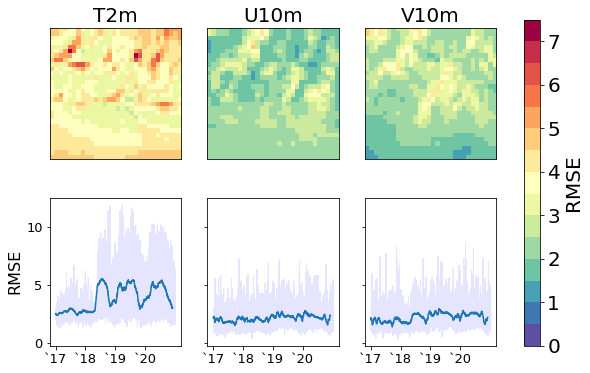

In [18]:
# RMSE
R_bounds = np.arange(0,8,0.5)
R_norm = mcol.BoundaryNorm(R_bounds,cmap.N)

fig, (axs1,axs2) = plt.subplots(2, 3,figsize=(10,6), sharey='row')

# axes 1
for ax, r, t in zip(axs1.flat,[T_rms_map, U_rms_map, V_rms_map],['T2m','U10m','V10m']):
    
    im =ax.imshow(np.flipud(r),vmin=0, vmax=8, cmap='Spectral_r',norm=R_norm)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(t,fontsize=fs)

cb = fig.colorbar(im, ax = (axs1,axs2))
cb.ax.tick_params(labelsize=fs)
cb.set_label(label='RMSE', fontsize = fs)


# --------------axes 2

for ax, r, t in zip(axs2.flat,[T_rms_NCEP_downv3km, U_rms_NCEP_downv3km, V_rms_NCEP_downv3km],['T2m','U10m','V10m']):
    ax.plot(hf.moving_average(r,int(24*30/3)))
    ax.fill_between(range(T_WRF_3km.shape[0]), r, r, color='b', alpha=.1)
    
    ax.tick_params(axis='both', labelsize=fs-7)
    ax.set_xticks([0,2920,5840,8768])
    ax.set_xticklabels(labels=['`17','`18', '`19', '`20'])

axs2[0].set_ylabel('RMSE', fontsize=16)

#fig.tight_layout()
plt.show()

fig.savefig('F:/Master_Thesis/Figures/More_Time_Analysis/RMSE_NCEP_space_time.pdf',bbox_inches='tight')

C:\Users\Famke\AppData\Local\Temp/ipykernel_18064/3733986316.py:11: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  im =ax.imshow(np.flipud(s),vmin=-0.1, vmax=1,cmap='Spectral',norm=S_norm)
C:\Users\Famke\AppData\Local\Temp/ipykernel_18064/3733986316.py:33: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = fig.colorbar(im, ax = (axs1,axs2), norm=S_norm)


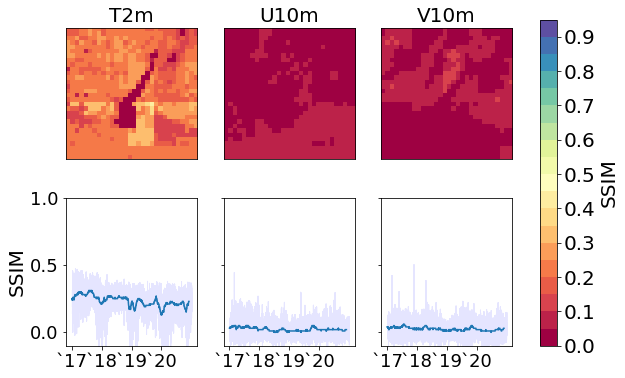

In [19]:
# SSIM
S_bounds = np.arange(0,1,0.05)
S_norm = mcol.BoundaryNorm(S_bounds,cmap.N)

fig, (axs1,axs2) = plt.subplots(2, 3,figsize=(10,6), sharey='row')

# axes 1

for ax, s, t in zip(axs1.flat,[T_ssim_map, U_ssim_map, V_ssim_map],['T2m','U10m','V10m']):
    
    im =ax.imshow(np.flipud(s),vmin=-0.1, vmax=1,cmap='Spectral',norm=S_norm)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(t,fontsize=fs)
    
# --------------axes 2

for ax, s, t in zip(axs2.flat, [T_ssim_NCEP_downv3km, U_ssim_NCEP_downv3km, V_ssim_NCEP_downv3km],['T2m','U10m','V10m']):
    ax.plot(hf.moving_average(s,int(24*30/3)))
    ax.fill_between(range(T_WRF_3km.shape[0]), s, s, color='b', alpha=.1)
    
    ax.tick_params(axis='both', labelsize=fs-2)
    ax.set_xticks([0,2920,5840,8768])
    ax.set_xticklabels(labels=['`17','`18', '`19', '`20'])
    
    ax.set_ylim(-0.1,1)
    
axs2[0].set_ylabel('SSIM', fontsize=fs)


#fig.tight_layout()

cb = fig.colorbar(im, ax = (axs1,axs2), norm=S_norm)
cb.ax.tick_params(labelsize=fs)
cb.set_label(label='SSIM', fontsize = fs)

plt.show()

fig.savefig('F:/Master_Thesis/Figures/More_Time_Analysis/SSIM_NCEP_space_time.pdf',bbox_inches='tight')

In [20]:
np.round(np.mean(T_ssim_NCEP_downv9km),3), np.round(np.mean(U_ssim_NCEP_downv9km),2),np.round(np.mean(V_ssim_NCEP_downv9km),2)

(0.202, 0.02, 0.04)

### Superresolution problem visualised

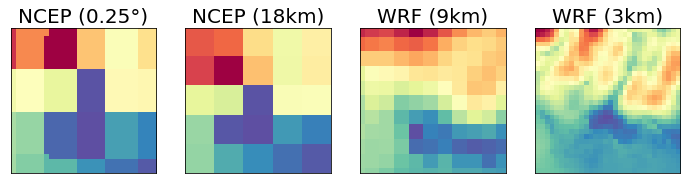

In [23]:
t = 290

fig, axs1 = plt.subplots(1, 4,figsize=(12, 6), sharey = False)

for ax, d, title in zip(axs1.flat,
                        [T_NCEP_near, T_NCEP_down,T_WRF_9km,T_WRF_3km],
                        ['NCEP (0.25\N{DEGREE SIGN})','NCEP (18km)','WRF (9km)', 'WRF (3km)']):
    im = ax.imshow(np.flipud(d[t,:,:]),cmap='Spectral')
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title, fontsize=fs)
    #if title == 'WRF 9km':
    #    ax.set_xlabel('RMSE (3km): %.2f\n\nSSIM (3km) %.2f' % (T_rms_9kmv3km[t],T_ssim_9kmv3km[t]), fontsize = fs-3)
    
    #if title == 'NCEP (0.25\N{DEGREE SIGN})':
    #    ax.set_xlabel('RMSE (3km): %.2f\nRMSE (9km): %.2f\n\nSSIM (9km) %.2f\nSSIM (3km) %.2f' % 
    #                 (T_rms_NCEP_downv3km[t], T_rms_NCEP_downv9km[t],T_ssim_NCEP_downv3km[t], T_ssim_NCEP_downv9km[t]), fontsize = fs-3)
    #if title == 'NCEP (18km)':
    #    ax.set_xlabel('RMSE (3km): %.2f\nRMSE (9km): %.2f\n\nSSIM (9km) %.2f\nSSIM (3km) %.2f' % 
    #                  (T_rms_NCEP_downv3km[t], T_rms_NCEP_downv9km[t],T_ssim_NCEP_downv3km[t], T_ssim_NCEP_downv9km[t]), fontsize = fs-3)

plt.show()
fig.savefig('F:/Master_Thesis/Figures/More_Time_Analysis/NCEP_WRF_9km_3km.pdf',bbox_inches='tight')

C:\Users\Famke\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Famke\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Famke\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

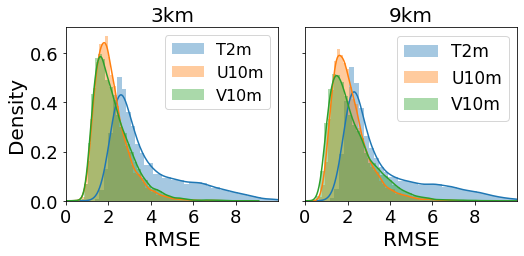

In [22]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(7,3), sharey='row', sharex='row')
fig.tight_layout()
    
sns.distplot(T_rms_NCEP_downv3km,ax=ax1, label='T2m')
sns.distplot(T_rms_NCEP_downv9km,ax=ax2, label='T2m')

sns.distplot(U_rms_NCEP_downv3km,ax=ax1, label='U10m')
sns.distplot(U_rms_NCEP_downv9km,ax=ax2, label='U10m')

sns.distplot(V_rms_NCEP_downv3km,ax=ax1, label='V10m')
sns.distplot(V_rms_NCEP_downv9km,ax=ax2, label='V10m')


ax1.tick_params(axis='both', labelsize=fs-2)
ax2.tick_params(axis='both', labelsize=fs-2)

ax1.set_title('3km', fontsize=fs)
ax2.set_title('9km', fontsize=fs)

ax1.set_xlabel('RMSE', fontsize=fs)
ax2.set_xlabel('RMSE', fontsize=fs)

ax1.set_xticks(np.arange(0,10,2))
ax1.set_xticklabels(np.arange(0,10,2))

ax1.set_ylabel('Density', fontsize=fs)

ax1.set_xlim(0,10)

ax1.legend(loc='upper right', fontsize=fs-4)
ax2.legend(fontsize=fs-3)

plt.show()
fig.savefig('F:/Master_Thesis/Figures/More_Time_Analysis/RMSE_NCEP_density.pdf', bbox_inches = 'tight')

C:\Users\Famke\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Famke\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Famke\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

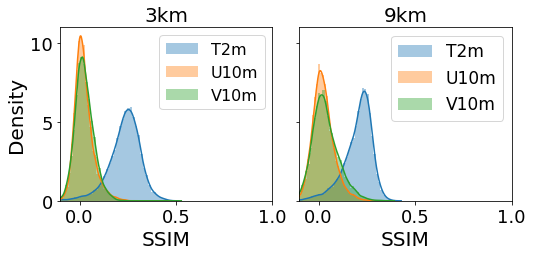

In [23]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(7,3), sharey='row', sharex='row')
fig.tight_layout()
    
sns.distplot(T_ssim_NCEP_downv3km,ax=ax1, label='T2m')
sns.distplot(T_ssim_NCEP_downv9km,ax=ax2, label='T2m')

sns.distplot(U_ssim_NCEP_downv3km,ax=ax1, label='U10m')
sns.distplot(U_ssim_NCEP_downv9km,ax=ax2, label='U10m')

sns.distplot(V_ssim_NCEP_downv3km,ax=ax1, label='V10m')
sns.distplot(V_ssim_NCEP_downv9km,ax=ax2, label='V10m')


ax1.tick_params(axis='both', labelsize=fs-2)
ax2.tick_params(axis='both', labelsize=fs-2)

ax1.set_title('3km', fontsize=fs)
ax2.set_title('9km', fontsize=fs)

ax1.set_xlabel('SSIM', fontsize=fs)
ax2.set_xlabel('SSIM', fontsize=fs)

ax1.set_ylabel('Density', fontsize=fs)

ax1.set_xlim(-0.1,1)
ax2.set_xlim(-0.1,1)

ax1.legend(loc='upper right', fontsize=fs-4)
ax2.legend(fontsize=fs-3)

plt.show()
fig.savefig('F:/Master_Thesis/Figures/More_Time_Analysis/SSIM_NCEP_density.pdf', bbox_inches = 'tight')

## Model performance

### Temperature

#### RMSE and SSIM maps and time

In [24]:
# RMSE and SSIM map and timeseries
temp_lr_mr_SR_train = hf.regrid(np.load('f:/Master_Thesis/Data/SR_data/More_Time/temperature/LR_MR/dataSR.npy'),3)
temp_lr_mr_SR_test = hf.regrid(np.load('f:/Master_Thesis/Data/SR_data/More_Time/temperature/LR_MR/test/dataSR.npy'),3)

In [25]:
# map
T_lr_mr_rms_train_map, T_lr_mr_ssim_train_map = hf.performance_map(temp_lr_mr_SR_train,T_WRF_9km)
T_lr_mr_rms_test_map, T_lr_mr_ssim_test_map = hf.performance_map(temp_lr_mr_SR_test,T_WRF_9km_test)

# time
T_lr_mr_rms_train, T_lr_mr_ssim_train = hf.performance_time(temp_lr_mr_SR_train,T_WRF_9km)
T_lr_mr_rms_test, T_lr_mr_ssim_test = hf.performance_time(temp_lr_mr_SR_test,T_WRF_9km_test)

In [26]:
print(T_lr_mr_rms_train_map.shape)


(30, 30)


C:\Users\Famke\AppData\Local\Temp/ipykernel_119924/877908012.py:12: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = fig.colorbar(im, ax = ax1, norm=S_norm)
C:\Users\Famke\AppData\Local\Temp/ipykernel_119924/877908012.py:45: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = fig.colorbar(im, ax = ax4, norm=R_norm)


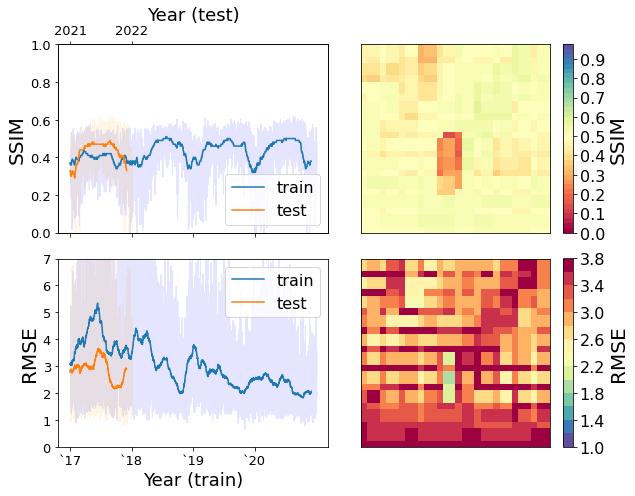

In [27]:
S_bounds = np.arange(0,1,0.025)
S_norm = mcol.BoundaryNorm(S_bounds,cmap.N)

R_bounds = np.arange(1,4,0.2)
R_norm = mcol.BoundaryNorm(R_bounds,cmap.N)


fig, ((ax2, ax1),(ax5,ax4)) = plt.subplots(2, 2,figsize=(9,7), sharex = 'col')

im = ax1.imshow(np.flipud(T_lr_mr_ssim_test_map), cmap='Spectral', norm=S_norm)

cb = fig.colorbar(im, ax = ax1, norm=S_norm)
cb.ax.tick_params(labelsize=fs-4)
cb.set_label(label='SSIM', fontsize = fs)


ax1.set_xticks([])
ax1.set_yticks([])
    

ax2.plot(hf.moving_average(T_lr_mr_ssim_train,int(24*30/3)), label= 'train')
ax2.fill_between(range(11688),T_lr_mr_ssim_train, T_lr_mr_ssim_train, color='b', alpha=.1)
ax2.set_ylim(0,1)

ax2.plot(hf.moving_average(T_lr_mr_ssim_test,int(24*30/3)), label = 'test')
ax2.fill_between(range(2920),T_lr_mr_ssim_test, T_lr_mr_ssim_test, color='orange', alpha=.1)

ax2.set_ylabel('SSIM', fontsize = fs)
ax2.legend(loc='lower right', fontsize=fs-4)

ax2.tick_params(axis='both', labelsize=fs-7)
ax2.set_xticks([0,2920,5840,8768])
ax2.set_xticklabels(labels=['`17','`18', '`19', '`20'])

ax3 = ax2.twiny()
ax3.set_xlim(ax2.get_xlim())
ax3.tick_params(axis='both', labelsize=fs-7)
ax3.set_xticks([0,2920])
ax3.set_xticklabels(labels=['2021','2022'])




im = ax4.imshow(np.flipud(T_lr_mr_rms_test_map), cmap='Spectral_r',norm=R_norm)
cb = fig.colorbar(im, ax = ax4, norm=R_norm)
cb.ax.tick_params(labelsize=fs-4)
cb.set_label(label='RMSE', fontsize = fs)


ax4.set_xticks([])
ax4.set_yticks([])
    

ax5.plot(hf.moving_average(T_lr_mr_rms_train,int(24*30/3)), label= 'train')
ax5.fill_between(range(11688), T_lr_mr_rms_train, T_lr_mr_rms_train, color='b', alpha=.1)
ax5.set_ylim(0,7)

ax5.plot(hf.moving_average(T_lr_mr_rms_test,int(24*30/3)), label = 'test')
ax5.fill_between(range(2920), T_lr_mr_rms_test, T_lr_mr_rms_test, color='orange', alpha=.1)

ax5.set_ylabel('RMSE', fontsize = fs)
ax5.legend(loc='upper right', fontsize=fs-4)

ax5.tick_params(axis='both', labelsize=fs-7)
ax5.set_xticks([0,2920,5840,8768])
ax5.set_xticklabels(labels=['`17','`18', '`19', '`20'])


ax3.set_xlabel('Year (test)', fontsize = fs-2)
ax5.set_xlabel('Year (train)', fontsize = fs-2)


fig.tight_layout()

plt.show()



fig.savefig('F:/Master_Thesis/Figures/More_Time_Analysis/space_time_T2m_lrmr.pdf',bbox_inches='tight')

In [28]:
from datetime import datetime, timedelta



def index_to_datetime(index, start_year=2017):
    '''
    Takes the index and returns the datetime
    '''
    days = index/8 
    start = datetime(start_year,1,1,0,0,0)      
    delta = timedelta(days)     
    offset = start + delta      

    return(offset)    




### Wind

u component

In [30]:
Wind_SR_train = np.load('f:/Master_Thesis/Data/SR_data/More_Time/wind/LR_MR/dataSR.npy')
Wind_SR_test = np.load('f:/Master_Thesis/Data/SR_data/More_Time/wind/LR_MR/test/dataSR.npy')

U_lr_mr_train = hf.regrid(Wind_SR_train[:,:,:,0],3)
U_lr_mr_test = hf.regrid(Wind_SR_test[:,:,:,0],3)

V_lr_mr_train = hf.regrid(Wind_SR_train[:,:,:,1],3)
V_lr_mr_test = hf.regrid(Wind_SR_test[:,:,:,1],3)

# map
U_lr_mr_rms_train_map, U_lr_mr_ssim_train_map = hf.performance_map(U_lr_mr_train,U_WRF_9km)
U_lr_mr_rms_test_map, U_lr_mr_ssim_test_map = hf.performance_map(U_lr_mr_test,U_WRF_9km_test)

V_lr_mr_rms_train_map, V_lr_mr_ssim_train_map = hf.performance_map(V_lr_mr_train,V_WRF_9km)
V_lr_mr_rms_test_map, V_lr_mr_ssim_test_map = hf.performance_map(V_lr_mr_test,V_WRF_9km_test)

# time
U_lr_mr_rms_train, U_lr_mr_ssim_train = hf.performance_time(U_lr_mr_train,U_WRF_9km)
U_lr_mr_rms_test, U_lr_mr_ssim_test = hf.performance_time(U_lr_mr_test,U_WRF_9km_test)

V_lr_mr_rms_train, V_lr_mr_ssim_train = hf.performance_time(V_lr_mr_train,V_WRF_9km)
V_lr_mr_rms_test, V_lr_mr_ssim_test = hf.performance_time(V_lr_mr_test,V_WRF_9km_test)

C:\Users\Famke\AppData\Local\Temp/ipykernel_119924/2952185070.py:12: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = fig.colorbar(im, ax = ax1, norm=S_norm)
C:\Users\Famke\AppData\Local\Temp/ipykernel_119924/2952185070.py:45: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = fig.colorbar(im, ax = ax4, norm=R_norm)


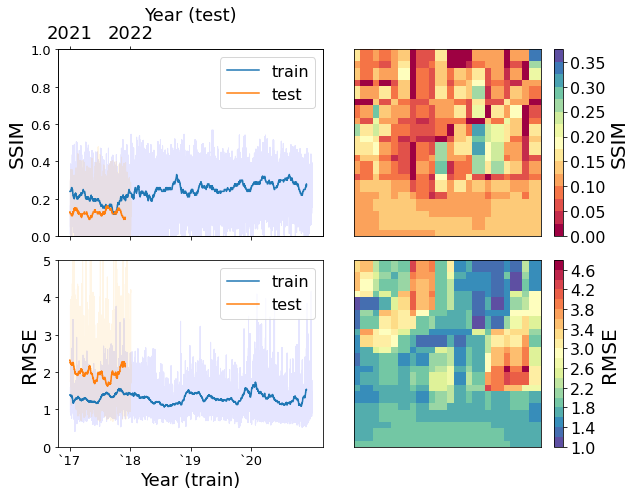

In [31]:
S_bounds = np.arange(0,0.4,0.025)
S_norm = mcol.BoundaryNorm(S_bounds,cmap.N)

R_bounds = np.arange(1,5,0.2)
R_norm = mcol.BoundaryNorm(R_bounds,cmap.N)


fig, ((ax2, ax1),(ax5,ax4)) = plt.subplots(2, 2,figsize=(9,7), sharex = 'col')

im = ax1.imshow(np.flipud(U_lr_mr_ssim_test_map), cmap='Spectral', norm=S_norm)

cb = fig.colorbar(im, ax = ax1, norm=S_norm)
cb.ax.tick_params(labelsize=fs-4)
cb.set_label(label='SSIM', fontsize = fs)


ax1.set_xticks([])
ax1.set_yticks([])
    

ax2.plot(hf.moving_average(U_lr_mr_ssim_train,int(24*30/3)), label= 'train')
ax2.fill_between(range(11688),U_lr_mr_ssim_train, U_lr_mr_ssim_train, color='b', alpha=.1)
ax2.set_ylim(0,1)

ax2.plot(hf.moving_average(U_lr_mr_ssim_test,int(24*30/3)), label = 'test')
ax2.fill_between(range(2920),U_lr_mr_ssim_test, U_lr_mr_ssim_test, color='orange', alpha=.1)

ax2.set_ylabel('SSIM', fontsize = fs)
ax2.legend(loc='upper right', fontsize=fs-4)

ax2.tick_params(axis='both', labelsize=fs-7)
ax2.set_xticks([0,2920,5840,8768])
ax2.set_xticklabels(labels=['`17','`18', '`19', '`20'])

ax3 = ax2.twiny()
ax3.set_xlim(ax2.get_xlim())
ax3.tick_params(axis='both', labelsize=fs-2)
ax3.set_xticks([0,2920])
ax3.set_xticklabels(labels=['2021','2022'])




im = ax4.imshow(np.flipud(U_lr_mr_rms_test_map), cmap='Spectral_r',norm=R_norm)
cb = fig.colorbar(im, ax = ax4, norm=R_norm)
cb.ax.tick_params(labelsize=fs-4)
cb.set_label(label='RMSE', fontsize = fs)


ax4.set_xticks([])
ax4.set_yticks([])
    

ax5.plot(hf.moving_average(U_lr_mr_rms_train,int(24*30/3)), label= 'train')
ax5.fill_between(range(11688), U_lr_mr_rms_train, U_lr_mr_rms_train, color='b', alpha=.1)
ax5.set_ylim(0,5)

ax5.plot(hf.moving_average(U_lr_mr_rms_test,int(24*30/3)), label = 'test')
ax5.fill_between(range(2920), U_lr_mr_rms_test, U_lr_mr_rms_test, color='orange', alpha=.1)

ax5.set_ylabel('RMSE', fontsize = fs)
ax5.legend(loc='upper right', fontsize=fs-4)

ax5.tick_params(axis='both', labelsize=fs-7)
ax5.set_xticks([0,2920,5840,8768])
ax5.set_xticklabels(labels=['`17','`18', '`19', '`20'])


ax3.set_xlabel('Year (test)', fontsize = fs-2)
ax5.set_xlabel('Year (train)', fontsize = fs-2)


fig.tight_layout()

plt.show()



fig.savefig('F:/Master_Thesis/Figures/More_Time_Analysis/space_time_U10m_lrmr.pdf',bbox_inches='tight')

C:\Users\Famke\AppData\Local\Temp/ipykernel_119924/681615130.py:12: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = fig.colorbar(im, ax = ax1, norm=S_norm)
C:\Users\Famke\AppData\Local\Temp/ipykernel_119924/681615130.py:45: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = fig.colorbar(im, ax = ax4, norm=R_norm)


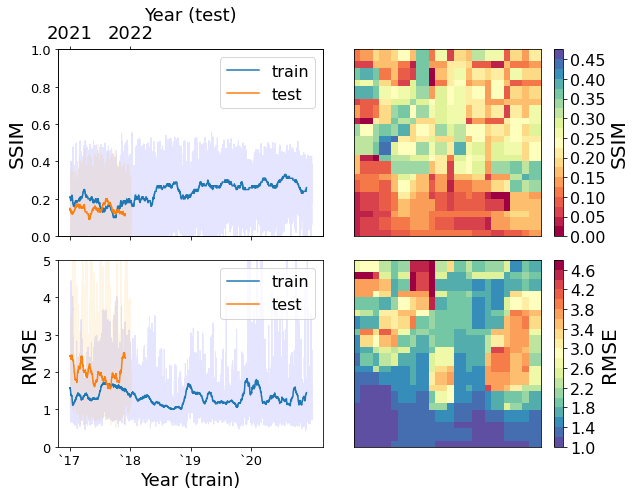

In [32]:
S_bounds = np.arange(0,0.5,0.025)
S_norm = mcol.BoundaryNorm(S_bounds,cmap.N)

R_bounds = np.arange(1,5,0.2)
R_norm = mcol.BoundaryNorm(R_bounds,cmap.N)


fig, ((ax2, ax1),(ax5,ax4)) = plt.subplots(2, 2,figsize=(9,7), sharex = 'col')

im = ax1.imshow(np.flipud(V_lr_mr_ssim_test_map), cmap='Spectral', norm=S_norm)

cb = fig.colorbar(im, ax = ax1, norm=S_norm)
cb.ax.tick_params(labelsize=fs-4)
cb.set_label(label='SSIM', fontsize = fs)


ax1.set_xticks([])
ax1.set_yticks([])
    

ax2.plot(hf.moving_average(V_lr_mr_ssim_train,int(24*30/3)), label= 'train')
ax2.fill_between(range(11688),V_lr_mr_ssim_train, V_lr_mr_ssim_train, color='b', alpha=.1)
ax2.set_ylim(0,1)

ax2.plot(hf.moving_average(V_lr_mr_ssim_test,int(24*30/3)), label = 'test')
ax2.fill_between(range(2920),V_lr_mr_ssim_test, V_lr_mr_ssim_test, color='orange', alpha=.1)

ax2.set_ylabel('SSIM', fontsize = fs)
ax2.legend(loc='upper right', fontsize=fs-4)

ax2.tick_params(axis='both', labelsize=fs-7)
ax2.set_xticks([0,2920,5840,8768])
ax2.set_xticklabels(labels=['`17','`18', '`19', '`20'])

ax3 = ax2.twiny()
ax3.set_xlim(ax2.get_xlim())
ax3.tick_params(axis='both', labelsize=fs-2)
ax3.set_xticks([0,2920])
ax3.set_xticklabels(labels=['2021','2022'])




im = ax4.imshow(np.flipud(V_lr_mr_rms_test_map), cmap='Spectral_r',norm=R_norm)
cb = fig.colorbar(im, ax = ax4, norm=R_norm)
cb.ax.tick_params(labelsize=fs-4)
cb.set_label(label='RMSE', fontsize = fs)


ax4.set_xticks([])
ax4.set_yticks([])
    

ax5.plot(hf.moving_average(V_lr_mr_rms_train,int(24*30/3)), label= 'train')
ax5.fill_between(range(11688), V_lr_mr_rms_train, V_lr_mr_rms_train, color='b', alpha=.1)
ax5.set_ylim(0,5)

ax5.plot(hf.moving_average(V_lr_mr_rms_test,int(24*30/3)), label = 'test')
ax5.fill_between(range(2920), V_lr_mr_rms_test, V_lr_mr_rms_test, color='orange', alpha=.1)

ax5.set_ylabel('RMSE', fontsize = fs)
ax5.legend(loc='upper right', fontsize=fs-4)

ax5.tick_params(axis='both', labelsize=fs-7)
ax5.set_xticks([0,2920,5840,8768])
ax5.set_xticklabels(labels=['`17','`18', '`19', '`20'])


ax3.set_xlabel('Year (test)', fontsize = fs-2)
ax5.set_xlabel('Year (train)', fontsize = fs-2)


fig.tight_layout()

plt.show()



fig.savefig('F:/Master_Thesis/Figures/More_Time_Analysis/space_time_V10m_lrmr.pdf',bbox_inches='tight')

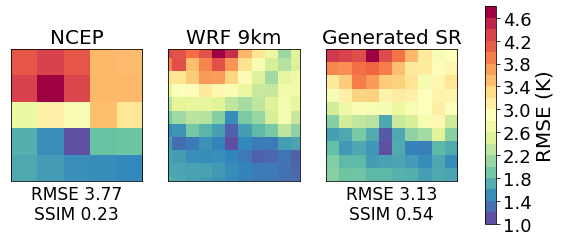

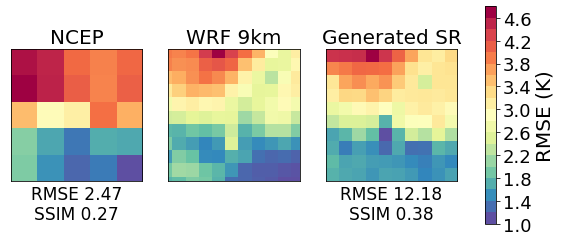

In [33]:
# BEST T
t = list(T_lr_mr_rms_test).index(min(T_lr_mr_rms_test))

fig, axs = plt.subplots(1, 3,figsize=(10,10))

axs[0].imshow(np.flipud(T_NCEP_test[t,:,:,0]), cmap='Spectral')
axs[0].set_title('NCEP', fontsize = fs)
axs[0].set_xlabel('RMSE %.2f\nSSIM %.2f' % (T_rms_NCEP_downv9km[t],T_ssim_NCEP_downv9km[t]), fontsize = fs-3)

axs[1].imshow(np.flipud(T_WRF_9km_test[t,:,:]), cmap='Spectral')
axs[1].set_title('WRF 9km', fontsize = fs)

axs[2].imshow(np.flipud(temp_lr_mr_SR_test[t,:,:]), cmap='Spectral')
axs[2].set_title('Generated SR', fontsize = fs)
axs[2].set_xlabel('RMSE %.2f\nSSIM %.2f' % (T_lr_mr_rms_train[t], T_lr_mr_ssim_train[t]), fontsize=fs-3)

cb = fig.colorbar(im, ax=axs,orientation='vertical', shrink=0.4)
cb.ax.tick_params(labelsize=fs-2)
cb.set_label(label='RMSE (K)', fontsize = fs)

for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])
    


plt.show()
fig.savefig('F:/Master_Thesis/Figures/More_Time_Analysis/best_SR_T2m_lrmr.pdf',bbox_inches='tight')




# WORST T
t = list(T_lr_mr_rms_test).index(max(T_lr_mr_rms_test))
fig, axs = plt.subplots(1, 3,figsize=(10,10))

axs[0].imshow(np.flipud(T_NCEP_test[t,:,:,0]), cmap='Spectral')
axs[0].set_title('NCEP', fontsize = fs)
axs[0].set_xlabel('RMSE %.2f\nSSIM %.2f' % (T_rms_NCEP_downv9km[t],T_ssim_NCEP_downv9km[t]), fontsize = fs-3)

axs[1].imshow(np.flipud(T_WRF_9km_test[t,:,:]), cmap='Spectral')
axs[1].set_title('WRF 9km', fontsize = fs)

axs[2].imshow(np.flipud(temp_lr_mr_SR_test[t,:,:]), cmap='Spectral')
axs[2].set_title('Generated SR', fontsize = fs)
axs[2].set_xlabel('RMSE %.2f\nSSIM %.2f' % (T_lr_mr_rms_test[t], T_lr_mr_ssim_test[t]), fontsize=fs-3)

cb = fig.colorbar(im, ax=axs,orientation='vertical',shrink=0.4)
cb.ax.tick_params(labelsize=fs-2)
cb.set_label(label='RMSE (K)', fontsize = fs)

for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])



plt.show()

fig.savefig('F:/Master_Thesis/Figures/More_Time_Analysis/worst_SR_T2m_lrmr.pdf',bbox_inches='tight')

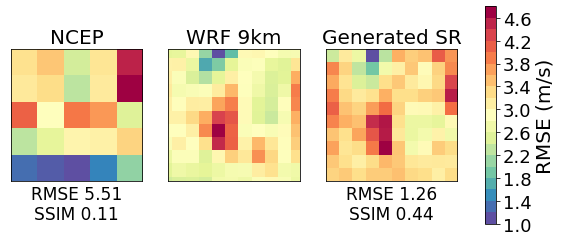

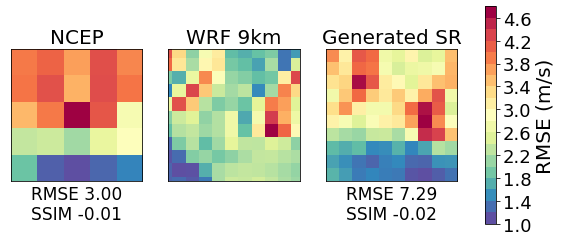

In [34]:
# BEST U
t = list(U_lr_mr_rms_test).index(min(U_lr_mr_rms_test))

fig, axs = plt.subplots(1, 3,figsize=(10,10))

axs[0].imshow(np.flipud(U_NCEP_test[t,:,:,0]), cmap='Spectral')
axs[0].set_title('NCEP', fontsize = fs)
axs[0].set_xlabel('RMSE %.2f\nSSIM %.2f' % (U_rms_NCEP_downv9km[t],U_ssim_NCEP_downv9km[t]), fontsize = fs-3)

axs[1].imshow(np.flipud(U_WRF_9km_test[t,:,:]), cmap='Spectral')
axs[1].set_title('WRF 9km', fontsize = fs)

axs[2].imshow(np.flipud(Wind_SR_test[t,:,:,0]), cmap='Spectral')
axs[2].set_title('Generated SR', fontsize = fs)
axs[2].set_xlabel('RMSE %.2f\nSSIM %.2f' % (U_lr_mr_rms_train[t], U_lr_mr_ssim_train[t]), fontsize=fs-3)

cb = fig.colorbar(im, ax=axs,orientation='vertical',shrink=0.4)
cb.ax.tick_params(labelsize=fs-2)
cb.set_label(label='RMSE (m/s)', fontsize = fs)

for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()
fig.savefig('F:/Master_Thesis/Figures/More_Time_Analysis/best_SR_U10m_lrmr.pdf',bbox_inches='tight')




# WORST U
t = list(U_lr_mr_rms_test).index(max(U_lr_mr_rms_test))
fig, axs = plt.subplots(1, 3,figsize=(10,10))

axs[0].imshow(np.flipud(U_NCEP_test[t,:,:,0]), cmap='Spectral')
axs[0].set_title('NCEP', fontsize = fs)
axs[0].set_xlabel('RMSE %.2f\nSSIM %.2f' % (U_rms_NCEP_downv9km[t],U_ssim_NCEP_downv9km[t]), fontsize = fs-3)

axs[1].imshow(np.flipud(U_WRF_9km_test[t,:,:]), cmap='Spectral')
axs[1].set_title('WRF 9km', fontsize = fs)

axs[2].imshow(np.flipud(Wind_SR_test[t,:,:,0]), cmap='Spectral')
axs[2].set_title('Generated SR', fontsize = fs)
axs[2].set_xlabel('RMSE %.2f\nSSIM %.2f' % (U_lr_mr_rms_test[t], U_lr_mr_ssim_test[t]), fontsize=fs-3)

cb = fig.colorbar(im, ax=axs,orientation='vertical',shrink=0.4)
cb.ax.tick_params(labelsize=fs-2)
cb.set_label(label='RMSE (m/s)', fontsize = fs)

for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

fig.savefig('F:/Master_Thesis/Figures/More_Time_Analysis/worst_SR_U10m_lrmr.pdf',bbox_inches='tight')

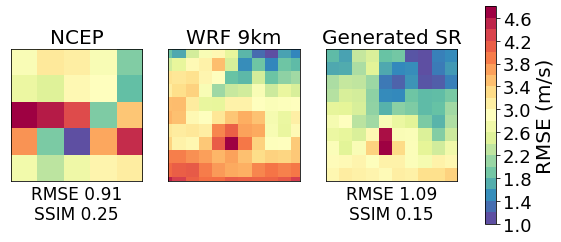

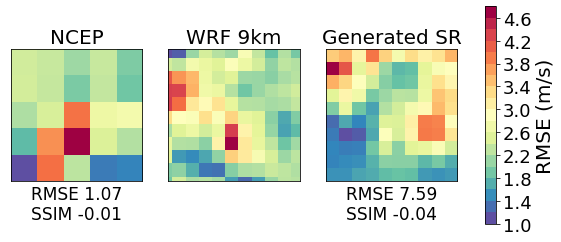

In [35]:
# BEST V
t = list(V_lr_mr_rms_test).index(min(V_lr_mr_rms_test))

fig, axs = plt.subplots(1, 3,figsize=(10,10))

axs[0].imshow(np.flipud(V_NCEP_test[t,:,:,0]), cmap='Spectral')
axs[0].set_title('NCEP', fontsize = fs)
axs[0].set_xlabel('RMSE %.2f\nSSIM %.2f' % (V_rms_NCEP_downv9km[t],V_ssim_NCEP_downv9km[t]), fontsize = fs-3)

axs[1].imshow(np.flipud(V_WRF_9km_test[t,:,:]), cmap='Spectral')
axs[1].set_title('WRF 9km', fontsize = fs)

axs[2].imshow(np.flipud(Wind_SR_test[t,:,:,1]), cmap='Spectral')
axs[2].set_title('Generated SR', fontsize = fs)
axs[2].set_xlabel('RMSE %.2f\nSSIM %.2f' % (V_lr_mr_rms_train[t], V_lr_mr_ssim_train[t]), fontsize=fs-3)

cb = fig.colorbar(im, ax=axs,orientation='vertical',shrink=0.4)
cb.ax.tick_params(labelsize=fs-2)
cb.set_label(label='RMSE (m/s)', fontsize = fs)

for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()
fig.savefig('F:/Master_Thesis/Figures/More_Time_Analysis/best_SR_V10m_lrmr.pdf',bbox_inches='tight')




# WORST V
t = list(V_lr_mr_rms_test).index(max(V_lr_mr_rms_test))
fig, axs = plt.subplots(1, 3,figsize=(10,10))

axs[0].imshow(np.flipud(V_NCEP_test[t,:,:,0]), cmap='Spectral')
axs[0].set_title('NCEP', fontsize = fs)
axs[0].set_xlabel('RMSE %.2f\nSSIM %.2f' % (V_rms_NCEP_downv9km[t],V_ssim_NCEP_downv9km[t]), fontsize = fs-3)

axs[1].imshow(np.flipud(V_WRF_9km_test[t,:,:]), cmap='Spectral')
axs[1].set_title('WRF 9km', fontsize = fs)

axs[2].imshow(np.flipud(Wind_SR_test[t,:,:,1]), cmap='Spectral')
axs[2].set_title('Generated SR', fontsize = fs)
axs[2].set_xlabel('RMSE %.2f\nSSIM %.2f' % (V_lr_mr_rms_test[t], V_lr_mr_ssim_test[t]), fontsize=fs-3)

cb = fig.colorbar(im, ax=axs,orientation='vertical',shrink=0.4)
cb.ax.tick_params(labelsize=fs-2)
cb.set_label(label='RMSE (m/s)', fontsize = fs)

for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

fig.savefig('F:/Master_Thesis/Figures/More_Time_Analysis/worst_SR_V10m_lrmr.pdf',bbox_inches='tight')

### MR to HR models

#### MAPS and time

In [8]:
temp_mr_hr_SR_train = np.load('F:/Master_Thesis/Data/SR_data/More_Time/temperature/MR_HR/dataSR.npy')[:,:,:,0]
temp_mr_hr_SR_test = np.load('F:/Master_Thesis/Data/SR_data/More_Time/temperature/MR_HR/test/dataSR.npy')[:,:,:,0]

Wind_SR_train = np.load('F:/Master_Thesis/Data/SR_data/More_Time/wind/MR_HR/dataSR.npy')
Wind_SR_test = np.load('F:/Master_Thesis/Data/SR_data/More_Time/wind/MR_HR/test/dataSR.npy')

In [37]:
U_mr_hr_train = Wind_SR_train[:,:,:,0]
U_mr_hr_test = Wind_SR_test[:,:,:,0]

V_mr_hr_train = Wind_SR_train[:,:,:,1]
V_mr_hr_test = Wind_SR_test[:,:,:,1]

In [38]:
# map
T_mr_hr_rms_train_map, T_mr_hr_ssim_train_map = hf.performance_map(temp_mr_hr_SR_train,T_WRF_3km)
T_mr_hr_rms_test_map, T_mr_hr_ssim_test_map = hf.performance_map(temp_mr_hr_SR_test,T_WRF_3km_test)

U_mr_hr_rms_train_map, U_mr_hr_ssim_train_map = hf.performance_map(U_mr_hr_train,U_WRF_3km)
U_mr_hr_rms_test_map, U_mr_hr_ssim_test_map = hf.performance_map(U_mr_hr_test,U_WRF_3km_test)

V_mr_hr_rms_train_map, V_mr_hr_ssim_train_map = hf.performance_map(V_mr_hr_train,V_WRF_3km)
V_mr_hr_rms_test_map, V_mr_hr_ssim_test_map = hf.performance_map(V_mr_hr_test,V_WRF_3km_test)

# time
T_mr_hr_rms_train, T_mr_hr_ssim_train = hf.performance_time(temp_mr_hr_SR_train,T_WRF_3km)
T_mr_hr_rms_test, T_mr_hr_ssim_test = hf.performance_time(temp_mr_hr_SR_test,T_WRF_3km_test)

U_mr_hr_rms_train, U_mr_hr_ssim_train = hf.performance_time(U_mr_hr_train,U_WRF_3km)
U_mr_hr_rms_test, U_mr_hr_ssim_test = hf.performance_time(U_mr_hr_test,U_WRF_3km_test)

V_mr_hr_rms_train, V_mr_hr_ssim_train = hf.performance_time(V_mr_hr_train,V_WRF_3km)
V_mr_hr_rms_test, V_mr_hr_ssim_test = hf.performance_time(V_mr_hr_test,V_WRF_3km_test)

C:\Users\Famke\AppData\Local\Temp/ipykernel_119924/403741971.py:12: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = fig.colorbar(im, ax = ax1, norm=S_norm)
C:\Users\Famke\AppData\Local\Temp/ipykernel_119924/403741971.py:45: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = fig.colorbar(im, ax = ax4, norm=R_norm)


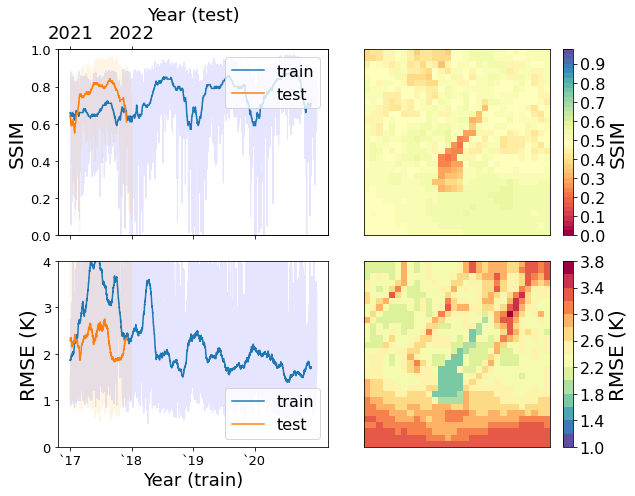

PermissionError: [Errno 13] Permission denied: 'F:/Master_Thesis/Figures/More_Time_Analysis/space_time_T2m_mrhr.pdf'

In [39]:
S_bounds = np.arange(0,1,0.025)
S_norm = mcol.BoundaryNorm(S_bounds,cmap.N)

R_bounds = np.arange(1,4,0.2)
R_norm = mcol.BoundaryNorm(R_bounds,cmap.N)


fig, ((ax2, ax1),(ax5,ax4)) = plt.subplots(2, 2,figsize=(9,7), sharex = 'col')

im = ax1.imshow(np.flipud(T_mr_hr_ssim_test_map), cmap='Spectral', norm=S_norm)

cb = fig.colorbar(im, ax = ax1, norm=S_norm)
cb.ax.tick_params(labelsize=fs-4)
cb.set_label(label='SSIM', fontsize = fs)


ax1.set_xticks([])
ax1.set_yticks([])
    

ax2.plot(hf.moving_average(T_mr_hr_ssim_train,int(24*30/3)), label= 'train')
ax2.fill_between(range(11688),T_mr_hr_ssim_train, T_mr_hr_ssim_train, color='b', alpha=.1)
ax2.set_ylim(0,1)

ax2.plot(hf.moving_average(T_mr_hr_ssim_test,int(24*30/3)), label = 'test')
ax2.fill_between(range(2920),T_mr_hr_ssim_test, T_mr_hr_ssim_test, color='orange', alpha=.1)

ax2.set_ylabel('SSIM', fontsize = fs)
ax2.legend(loc='upper right', fontsize=fs-4)

ax2.tick_params(axis='both', labelsize=fs-7)
ax2.set_xticks([0,2920,5840,8768])
ax2.set_xticklabels(labels=['`17','`18', '`19', '`20'])

ax3 = ax2.twiny()
ax3.set_xlim(ax2.get_xlim())
ax3.tick_params(axis='both', labelsize=fs-2)
ax3.set_xticks([0,2920])
ax3.set_xticklabels(labels=['2021','2022'])




im = ax4.imshow(np.flipud(T_mr_hr_rms_test_map), cmap='Spectral_r',norm=R_norm)
cb = fig.colorbar(im, ax = ax4, norm=R_norm)
cb.ax.tick_params(labelsize=fs-4)
cb.set_label(label='RMSE (K)', fontsize = fs)


ax4.set_xticks([])
ax4.set_yticks([])
    

ax5.plot(hf.moving_average(T_mr_hr_rms_train,int(24*30/3)), label= 'train')
ax5.fill_between(range(11688), T_mr_hr_rms_train, T_mr_hr_rms_train, color='b', alpha=.1)
ax5.set_ylim(0,4)

ax5.plot(hf.moving_average(T_mr_hr_rms_test,int(24*30/3)), label = 'test')
ax5.fill_between(range(2920), T_mr_hr_rms_test, T_mr_hr_rms_test, color='orange', alpha=.1)

ax5.set_ylabel('RMSE (K)', fontsize = fs)
ax5.legend(loc='lower right', fontsize=fs-4)

ax5.tick_params(axis='both', labelsize=fs-7)
ax5.set_xticks([0,2920,5840,8768])
ax5.set_xticklabels(labels=['`17','`18', '`19', '`20'])


ax3.set_xlabel('Year (test)', fontsize = fs-2)
ax5.set_xlabel('Year (train)', fontsize = fs-2)


fig.tight_layout()

plt.show()


fig.savefig('F:/Master_Thesis/Figures/More_Time_Analysis/space_time_T2m_mrhr.pdf',bbox_inches='tight')

In [ ]:
S_bounds = np.arange(0,0.4,0.025)
S_norm = mcol.BoundaryNorm(S_bounds,cmap.N)

R_bounds = np.arange(0,4,0.2)
R_norm = mcol.BoundaryNorm(R_bounds,cmap.N)


fig, ((ax2, ax1),(ax5,ax4)) = plt.subplots(2, 2,figsize=(9,7), sharex = 'col')

im = ax1.imshow(np.flipud(U_mr_hr_ssim_test_map), cmap='Spectral', norm=S_norm)

cb = fig.colorbar(im, ax = ax1, norm=S_norm)
cb.ax.tick_params(labelsize=fs-4)
cb.set_label(label='SSIM', fontsize = fs)


ax1.set_xticks([])
ax1.set_yticks([])
    

ax2.plot(hf.moving_average(U_mr_hr_ssim_train,int(24*30/3)), label= 'train')
ax2.fill_between(range(11688),U_mr_hr_ssim_train, U_mr_hr_ssim_train, color='b', alpha=.1)
ax2.set_ylim(0,1)

ax2.plot(hf.moving_average(U_mr_hr_ssim_test,int(24*30/3)), label = 'test')
ax2.fill_between(range(2920),U_mr_hr_ssim_test, U_mr_hr_ssim_test, color='orange', alpha=.1)

ax2.set_ylabel('SSIM', fontsize = fs)
ax2.legend(loc='upper right', fontsize=fs-4)

ax2.tick_params(axis='both', labelsize=fs-7)
ax2.set_xticks([0,2920,5840,8768])
ax2.set_xticklabels(labels=['`17','`18', '`19', '`20'])

ax3 = ax2.twiny()
ax3.set_xlim(ax2.get_xlim())
ax3.tick_params(axis='both', labelsize=fs-2)
ax3.set_xticks([0,2920])
ax3.set_xticklabels(labels=['2021','2022'])




im = ax4.imshow(np.flipud(U_mr_hr_rms_test_map), cmap='Spectral_r',norm=R_norm)
cb = fig.colorbar(im, ax = ax4, norm=R_norm)
cb.ax.tick_params(labelsize=fs-4)
cb.set_label(label='RMSE (m/s)', fontsize = fs)


ax4.set_xticks([])
ax4.set_yticks([])
    

ax5.plot(hf.moving_average(U_mr_hr_rms_train,int(24*30/3)), label= 'train')
ax5.fill_between(range(11688), U_mr_hr_rms_train, U_mr_hr_rms_train, color='b', alpha=.1)
ax5.set_ylim(0,4)

ax5.plot(hf.moving_average(U_mr_hr_rms_test,int(24*30/3)), label = 'test')
ax5.fill_between(range(2920), U_mr_hr_rms_test, U_mr_hr_rms_test, color='orange', alpha=.1)

ax5.set_ylabel('RMSE (m/s)', fontsize = fs)
ax5.legend(loc='lower right', fontsize=fs-4)

ax5.tick_params(axis='both', labelsize=fs-7)
ax5.set_xticks([0,2920,5840,8768])
ax5.set_xticklabels(labels=['`17','`18', '`19', '`20'])


ax3.set_xlabel('Year (test)', fontsize = fs-2)
ax5.set_xlabel('Year (train)', fontsize = fs-2)


fig.tight_layout()

plt.show()



fig.savefig('F:/Master_Thesis/Figures/More_Time_Analysis/space_time_U10m_mrhr.pdf',bbox_inches='tight')

In [ ]:
S_bounds = np.arange(0,0.4,0.025)
S_norm = mcol.BoundaryNorm(S_bounds,cmap.N)

R_bounds = np.arange(0,4,0.2)
R_norm = mcol.BoundaryNorm(R_bounds,cmap.N)


fig, ((ax2, ax1),(ax5,ax4)) = plt.subplots(2, 2,figsize=(9,7), sharex = 'col')

im = ax1.imshow(np.flipud(V_mr_hr_ssim_test_map), cmap='Spectral', norm=S_norm)

cb = fig.colorbar(im, ax = ax1, norm=S_norm)
cb.ax.tick_params(labelsize=fs-4)
cb.set_label(label='SSIM', fontsize = fs)


ax1.set_xticks([])
ax1.set_yticks([])
    

ax2.plot(hf.moving_average(V_mr_hr_ssim_train,int(24*30/3)), label= 'train')
ax2.fill_between(range(11688),V_mr_hr_ssim_train, V_mr_hr_ssim_train, color='b', alpha=.1)
ax2.set_ylim(0,1)

ax2.plot(hf.moving_average(V_mr_hr_ssim_test,int(24*30/3)), label = 'test')
ax2.fill_between(range(2920),V_mr_hr_ssim_test, V_mr_hr_ssim_test, color='orange', alpha=.1)

ax2.set_ylabel('SSIM', fontsize = fs)
ax2.legend(loc='upper right', fontsize=fs-4)

ax2.tick_params(axis='both', labelsize=fs-7)
ax2.set_xticks([0,2920,5840,8768])
ax2.set_xticklabels(labels=['`17','`18', '`19', '`20'])

ax3 = ax2.twiny()
ax3.set_xlim(ax2.get_xlim())
ax3.tick_params(axis='both', labelsize=fs-2)
ax3.set_xticks([0,2920])
ax3.set_xticklabels(labels=['2021','2022'])




im = ax4.imshow(np.flipud(V_mr_hr_rms_test_map), cmap='Spectral_r',norm=R_norm)
cb = fig.colorbar(im, ax = ax4, norm=R_norm)
cb.ax.tick_params(labelsize=fs-4)
cb.set_label(label='RMSE (m/s)', fontsize = fs)


ax4.set_xticks([])
ax4.set_yticks([])
    

ax5.plot(hf.moving_average(V_mr_hr_rms_train,int(24*30/3)), label= 'train')
ax5.fill_between(range(11688), V_mr_hr_rms_train, V_mr_hr_rms_train, color='b', alpha=.1)
ax5.set_ylim(0,4)

ax5.plot(hf.moving_average(V_mr_hr_rms_test,int(24*30/3)), label = 'test')
ax5.fill_between(range(2920), V_mr_hr_rms_test, V_mr_hr_rms_test, color='orange', alpha=.1)

ax5.set_ylabel('RMSE (m/s)', fontsize = fs)
ax5.legend(loc='lower right', fontsize=fs-4)

ax5.tick_params(axis='both', labelsize=fs-7)
ax5.set_xticks([0,2920,5840,8768])
ax5.set_xticklabels(labels=['`17','`18', '`19', '`20'])


ax3.set_xlabel('Year (test)', fontsize = fs-2)
ax5.set_xlabel('Year (train)', fontsize = fs-2)


fig.tight_layout()

plt.show()



fig.savefig('F:/Master_Thesis/Figures/More_Time_Analysis/space_time_V10m_mrhr.pdf',bbox_inches='tight')

In [ ]:
# BEST
t = T_mr_hr_rms_test.index(min(T_mr_hr_rms_test))

print(index_to_datetime(t,2021))

fig, axs = plt.subplots(1, 3,figsize=(12,4))

for ax, r, title, err in zip(axs.flat,
                         [T_NCEP_test[t,:,:,0],T_WRF_3km_test[t,:,:], temp_mr_hr_SR_test[t]],
                         ['NCEP GFS','WRF 3km','Generated SR'],
                         [(T_rms_NCEP_downv3km[t],T_ssim_NCEP_downv3km[t]),'' ,(T_mr_hr_rms_test[t], T_mr_hr_ssim_test[t])]
                            ):
                    

    im = ax.imshow(np.flipud(r), cmap='Spectral_r',
                   vmin=min([np.min(T_NCEP_test[t,:,:,0]),np.min(T_WRF_3km_test[t,:,:]), np.min(temp_mr_hr_SR_test[t])]), 
                   vmax=max([np.max(T_NCEP_test[t,:,:,0]),np.max(T_WRF_3km_test[t,:,:]), np.max(temp_mr_hr_SR_test[t])]))
    ax.set_title(title, fontsize = fs)
    if title == 'WRF 3km':
        pass
    else:
        ax.set_xlabel('RMSE %.2f\nSSIM %.2f' % err, fontsize = fs-3)

for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])

cb = fig.colorbar(im, ax=axs,orientation='vertical')
cb.ax.tick_params(labelsize=fs-2)
cb.set_label(label='K', fontsize = fs)

plt.show()

fig.savefig('F:/Master_Thesis/Figures/More_Time_Analysis/best_SR_T2m_mrhr.pdf',bbox_inches='tight')





# WORST
t = T_mr_hr_rms_test.index(max(T_mr_hr_rms_test))
print(index_to_datetime(t,2021))

fig, axs = plt.subplots(1, 3,figsize=(12,4))

for ax, r, title, err in zip(axs.flat,
                         [T_NCEP_test[t,:,:,0],T_WRF_3km_test[t,:,:], temp_mr_hr_SR_test[t]],
                         ['NCEP','WRF 3km','Generated SR'],
                         [(T_rms_NCEP_downv9km[t],T_ssim_NCEP_downv9km[t]),'' ,(T_mr_hr_rms_test[t], T_mr_hr_ssim_test[t])]
                            ):
                    

    im = ax.imshow(np.flipud(r), cmap='Spectral_r',
                   vmin=min([np.min(T_NCEP_test[t,:,:,0]),np.min(T_WRF_3km_test[t,:,:]), np.min(temp_mr_hr_SR_test[t])]), 
                   vmax=max([np.max(T_NCEP_test[t,:,:,0]),np.max(T_WRF_3km_test[t,:,:]), np.max(temp_mr_hr_SR_test[t])]))
    ax.set_title(title, fontsize = fs)
    if title == 'WRF 3km':
        pass
    else:
        ax.set_xlabel('RMSE %.2f\nSSIM %.2f' % err, fontsize = fs-3)

for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])
        
cb = fig.colorbar(im, ax=axs,orientation='vertical')
cb.ax.tick_params(labelsize=fs-2)
cb.set_label(label='K', fontsize = fs)

plt.show()

fig.savefig('F:/Master_Thesis/Figures/More_Time_Analysis/worst_SR_T2m_mrhr.pdf',bbox_inches='tight')

In [ ]:
# BEST
t = U_mr_hr_rms_test.index(min(U_mr_hr_rms_test))

print(index_to_datetime(t,2021))

fig, axs = plt.subplots(1, 3,figsize=(12,4))

for ax, r, title, err in zip(axs.flat,
                         [U_NCEP_test[t,:,:,0],U_WRF_3km_test[t,:,:], U_mr_hr_test[t]],
                         ['NCEP GFS','WRF 3km','Generated SR'],
                         [(U_rms_NCEP_downv3km[t],U_ssim_NCEP_downv3km[t]),'' ,(U_mr_hr_rms_test[t], U_mr_hr_ssim_test[t])]
                            ):
                    

    im = ax.imshow(np.flipud(r), cmap='Spectral_r',
                   vmin=min([np.min(U_NCEP_test[t,:,:,0]),np.min(U_WRF_3km_test[t,:,:]), np.min(U_mr_hr_test[t])]), 
                   vmax=max([np.max(U_NCEP_test[t,:,:,0]),np.max(U_WRF_3km_test[t,:,:]), np.max(U_mr_hr_test[t])]))
    ax.set_title(title, fontsize = fs)
    if title == 'WRF 3km':
        pass
    else:
        ax.set_xlabel('RMSE %.2f\nSSIM %.2f' % err, fontsize = fs-3)

for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])

cb = fig.colorbar(im, ax=axs,orientation='vertical')
cb.ax.tick_params(labelsize=fs-2)
cb.set_label(label='m/s', fontsize = fs)

plt.show()
fig.savefig('F:/Master_Thesis/Figures/More_Time_Analysis/best_SR_U10m_MRHR.pdf', bbox_inches = 'tight')





# WORST
t = U_mr_hr_rms_test.index(max(U_mr_hr_rms_test))
print(t)
print(index_to_datetime(t,2021))

fig, axs = plt.subplots(1, 3,figsize=(12,4))

for ax, r, title, err in zip(axs.flat,
                         [U_NCEP_test[t,:,:,0],U_WRF_3km_test[t,:,:], U_mr_hr_test[t]],
                         ['NCEP','WRF 3km','Generated SR'],
                         [(U_rms_NCEP_downv9km[t],U_ssim_NCEP_downv9km[t]),'' ,(U_mr_hr_rms_test[t], U_mr_hr_ssim_test[t])]
                            ):
                    

    im = ax.imshow(np.flipud(r), cmap='Spectral_r',
                   vmin=min([np.min(U_NCEP_test[t,:,:,0]),np.min(U_WRF_3km_test[t,:,:]), np.min(U_mr_hr_test[t])]), 
                   vmax=max([np.max(U_NCEP_test[t,:,:,0]),np.max(U_WRF_3km_test[t,:,:]), np.max(U_mr_hr_test[t])]))
    ax.set_title(title, fontsize = fs)
    if title == 'WRF 3km':
        pass
    else:
        ax.set_xlabel('RMSE %.2f\nSSIM %.2f' % err, fontsize = fs-3)

for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])
        
cb = fig.colorbar(im, ax=axs,orientation='vertical')
cb.ax.tick_params(labelsize=fs-2)
cb.set_label(label='m/s', fontsize = fs)

plt.show()

fig.savefig('F:/Master_Thesis/Figures/More_Time_Analysis/worst_SR_U10m_MRHR.pdf', bbox_inches = 'tight')

In [ ]:
# BEST
t = V_mr_hr_rms_test.index(min(V_mr_hr_rms_test))

print(index_to_datetime(t,2021))

fig, axs = plt.subplots(1, 3,figsize=(12,4))

for ax, r, title, err in zip(axs.flat,
                         [V_NCEP_test[t,:,:,0],V_WRF_3km_test[t,:,:], V_mr_hr_test[t]],
                         ['NCEP GFS','WRF 3km','Generated SR'],
                         [(V_rms_NCEP_downv3km[t],V_ssim_NCEP_downv3km[t]),'' ,(V_mr_hr_rms_test[t], V_mr_hr_ssim_test[t])]
                            ):
                    

    im = ax.imshow(np.flipud(r), cmap='Spectral_r',
                   vmin=min([np.min(V_NCEP_test[t,:,:,0]),np.min(V_WRF_3km_test[t,:,:]), np.min(V_mr_hr_test[t])]), 
                   vmax=max([np.max(V_NCEP_test[t,:,:,0]),np.max(V_WRF_3km_test[t,:,:]), np.max(V_mr_hr_test[t])]))
    ax.set_title(title, fontsize = fs)
    if title == 'WRF 3km':
        pass
    else:
        ax.set_xlabel('RMSE %.2f\nSSIM %.2f' % err, fontsize = fs-3)

for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])

cb = fig.colorbar(im, ax=axs,orientation='vertical')
cb.ax.tick_params(labelsize=fs-2)
cb.set_label(label='m/s', fontsize = fs)

plt.show()
fig.savefig('F:/Master_Thesis/Figures/More_Time_Analysis/best_SR_V10m_MRHR.pdf', bbox_inches = 'tight')





# WORST
t = V_mr_hr_rms_test.index(max(V_mr_hr_rms_test))
print(t)
print(index_to_datetime(t,2021))

fig, axs = plt.subplots(1, 3,figsize=(12,4))

for ax, r, title, err in zip(axs.flat,
                         [V_NCEP_test[t,:,:,0],V_WRF_3km_test[t,:,:], V_mr_hr_test[t]],
                         ['NCEP','WRF 3km','Generated SR'],
                         [(V_rms_NCEP_downv9km[t],V_ssim_NCEP_downv9km[t]),'' ,(V_mr_hr_rms_test[t], V_mr_hr_ssim_test[t])]
                            ):
                    

    im = ax.imshow(np.flipud(r), cmap='Spectral_r',
                   vmin=min([np.min(V_NCEP_test[t,:,:,0]),np.min(V_WRF_3km_test[t,:,:]), np.min(V_mr_hr_test[t])]), 
                   vmax=max([np.max(V_NCEP_test[t,:,:,0]),np.max(V_WRF_3km_test[t,:,:]), np.max(V_mr_hr_test[t])]))
    ax.set_title(title, fontsize = fs)
    if title == 'WRF 3km':
        pass
    else:
        ax.set_xlabel('RMSE %.2f\nSSIM %.2f' % err, fontsize = fs-3)

for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])
        
cb = fig.colorbar(im, ax=axs,orientation='vertical')
cb.ax.tick_params(labelsize=fs-2)
cb.set_label(label='m/s', fontsize = fs)

plt.show()

fig.savefig('F:/Master_Thesis/Figures/More_Time_Analysis/worst_SR_V10m_MRHR.pdf', bbox_inches = 'tight')

### LR, MR, HR and SR

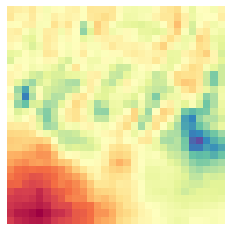

In [9]:
t = 560
fig = plt.figure()
plt.imshow(np.flipud(Wind_SR_train[t,:,:,0]), cmap='Spectral')
plt.axis('off')
plt.show()
fig.savefig('F:/Master_Thesis/Figures/More_Time_Analysis/SR.pdf',bbox_inches='tight')

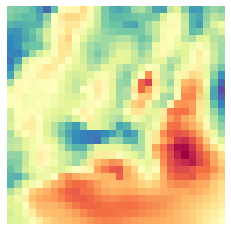

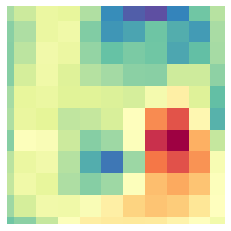

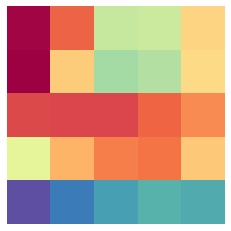

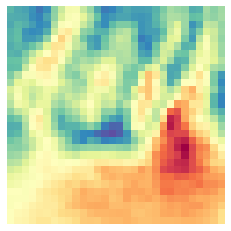

In [28]:
#t = 560
t = 666

fig = plt.figure()
plt.imshow(np.flipud(U_WRF_3km[t]),cmap='Spectral')
plt.axis('off')
plt.show()
fig.savefig('F:/Master_Thesis/Figures/More_Time_Analysis/HR.pdf',bbox_inches='tight')

fig = plt.figure()
plt.imshow(np.flipud(U_WRF_9km[t]),cmap='Spectral')
plt.axis('off')
plt.show()
fig.savefig('F:/Master_Thesis/Figures/More_Time_Analysis/MR.pdf',bbox_inches='tight')

fig = plt.figure()
plt.imshow(np.flipud(U_NCEP_down[t]), cmap='Spectral')
plt.axis('off')
plt.show()
fig.savefig('F:/Master_Thesis/Figures/More_Time_Analysis/LR.pdf',bbox_inches='tight')

fig = plt.figure()
plt.imshow(np.flipud(Wind_SR_train[t,:,:,0]), cmap='Spectral')
plt.axis('off')
plt.show()
fig.savefig('F:/Master_Thesis/Figures/More_Time_Analysis/SR.pdf',bbox_inches='tight')